In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(X_train, y_train), (X_test, y_test) = \
    reuters.load_data(num_words=1000, test_split=0.2) # num_words : 빈도가 1~1000에 해당하는 단어만 선택해서 불러오는 것

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [4]:
# 총 뉴스기사
8982 + 2246

11228

In [5]:
import numpy as np

In [6]:
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [7]:
X_train.shape

(8982,)

In [8]:
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [9]:
y_train.shape

(8982,)

In [10]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [11]:
help(reuters.load_data)

Help on function load_data in module keras.datasets.reuters:

load_data(path='reuters.npz', num_words=None, skip_top=0, maxlen=None, test_split=0.2, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)
    Loads the Reuters newswire classification dataset.
    
    This is a dataset of 11,228 newswires from Reuters, labeled over 46 topics.
    
    This was originally generated by parsing and preprocessing the classic
    Reuters-21578 dataset, but the preprocessing code is no longer packaged
    with Keras. See this
    [github discussion](https://github.com/keras-team/keras/issues/12072)
    for more info.
    
    Each newswire is encoded as a list of word indexes (integers).
    For convenience, words are indexed by overall frequency in the dataset,
    so that for instance the integer "3" encodes the 3rd most frequent word in
    the data. This allows for quick filtering operations such as:
    "only consider the top 10,000 most
    common words, but eliminate the top 20 mo

In [12]:
from tensorflow.keras.preprocessing import sequence

In [13]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

In [17]:
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [22]:
history = model.fit(X_train, y_train, 
                    batch_size=20, 
                    epochs=200, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 12s 15ms/step - loss: 2.2606 - accuracy: 0.4264 - val_loss: 2.0087 - val_accuracy: 0.4951
Epoch 2/200
450/450 [==============================] - 6s 14ms/step - loss: 1.9509 - accuracy: 0.5026 - val_loss: 1.8769 - val_accuracy: 0.5530
Epoch 3/200
450/450 [==============================] - 6s 14ms/step - loss: 1.7767 - accuracy: 0.5522 - val_loss: 1.7165 - val_accuracy: 0.5672
Epoch 4/200
450/450 [==============================] - 6s 13ms/step - loss: 1.6509 - accuracy: 0.5740 - val_loss: 1.6724 - val_accuracy: 0.5739
Epoch 5/200
450/450 [==============================] - 6s 14ms/step - loss: 1.5514 - accuracy: 0.5950 - val_loss: 1.5497 - val_accuracy: 0.6060
Epoch 6/200
450/450 [==============================] - 7s 14ms/step - loss: 1.4293 - accuracy: 0.6286 - val_loss: 1.4296 - val_accuracy: 0.6345
Epoch 7/200
450/450 [==============================] - 7s 15ms/step - loss: 1.2982 - accuracy: 0.6690 - val_loss: 1.3565 - val_accuracy

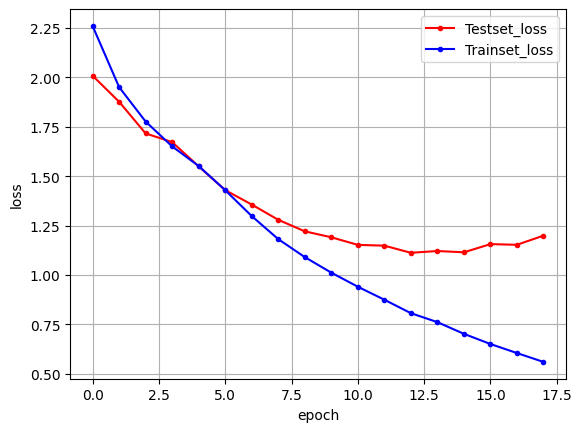

In [23]:
import matplotlib.pyplot as plt

# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()